In [1]:
import torch 
from dataloader import ECG_Data, prepare_dataset
from resnet_1d import SERes1d
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def training_loop(model:torch.nn.Module,
                  optimizer,
                  criterion,
                  train_loader:torch.utils.data.DataLoader,
                  test_loader:torch.utils.data.DataLoader,
                  epochs:int = 100,
                  )-> tuple :
    
    losses = np.array([])
    accuracies = np.array([])
    for epoch in range(epochs):
        running_loss = 0.0
        train_acc = 0.0
        for data, label in train_loader:
            out = model(data)
            loss = criterion(out, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_acc += torch.sum(torch.sigmoid(out).argmax(dim=1) == label)
            running_loss += loss.item()*data.size(0)
        accuracies = np.append(accuracies,train_acc/len(train_loader.dataset))
        losses = np.append(losses, running_loss/len(train_loader.dataset))
        print(f'Epoch:{epoch}  Loss:{losses[epoch]}, accuracy:{accuracies[epoch]}')

    return accuracies,losses
    

In [10]:
final_data=prepare_dataset(r"sample_dataset/ptbxl_database.csv")


    #split zrobiłem sklearnem bo po co się męczyć
ECG_train,ECG_test=train_test_split(final_data,test_size=0.2,random_state=42)

    #inaczej nie działa xd
ECG_train=ECG_train.reset_index()
ECG_test=ECG_test.reset_index()
    #tu ważne żeby podać ścieżkę do folderu z danymi, ale tylko folderu, bo potem to już się samo sklei
train_dataset=ECG_Data(ECG_train, r"sample_dataset/")
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=2)
test_dataset=ECG_Data(ECG_test, r"sample_dataset/")
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=2)

In [11]:
number_of_channels=1
number_of_classes=5
model = SERes1d(number_of_channels,number_of_classes)

In [12]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
number_of_epochs = 50

In [13]:
accuracies,losses = training_loop(model,optimizer,criterion,train_loader,test_loader,number_of_epochs)

Epoch:0  Loss:2.2747747247869317, accuracy:0.1818181872367859
Epoch:1  Loss:1.8079305345361882, accuracy:0.27272728085517883
Epoch:2  Loss:1.2010981386358088, accuracy:0.5454545617103577
Epoch:3  Loss:0.5791837193749168, accuracy:0.9090909361839294
Epoch:4  Loss:0.3316214775497263, accuracy:1.0
Epoch:5  Loss:0.18593797764994882, accuracy:1.0
Epoch:6  Loss:0.11186261881481517, accuracy:1.0
Epoch:7  Loss:0.07190340486439792, accuracy:1.0
Epoch:8  Loss:0.04737704755230383, accuracy:1.0
Epoch:9  Loss:0.03367783264680342, accuracy:1.0
Epoch:10  Loss:0.026071246882731266, accuracy:1.0
Epoch:11  Loss:0.020911827514117413, accuracy:1.0
Epoch:12  Loss:0.017038801515644245, accuracy:1.0
Epoch:13  Loss:0.014216794378378174, accuracy:1.0
Epoch:14  Loss:0.012118537317622791, accuracy:1.0
Epoch:15  Loss:0.010510102845728397, accuracy:1.0
Epoch:16  Loss:0.00925390591675585, accuracy:1.0
Epoch:17  Loss:0.008251790973273191, accuracy:1.0
Epoch:18  Loss:0.007428268013014035, accuracy:1.0
Epoch:19  Loss:

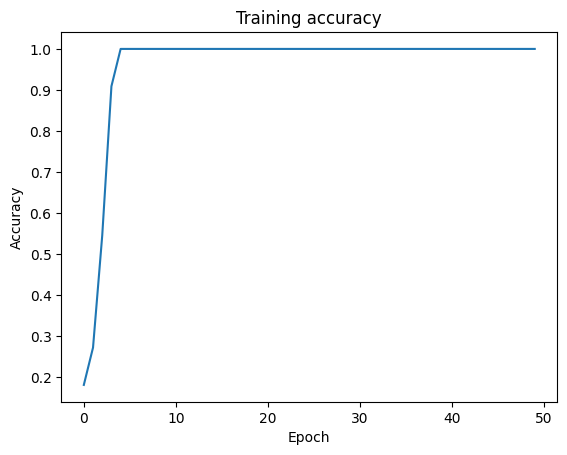

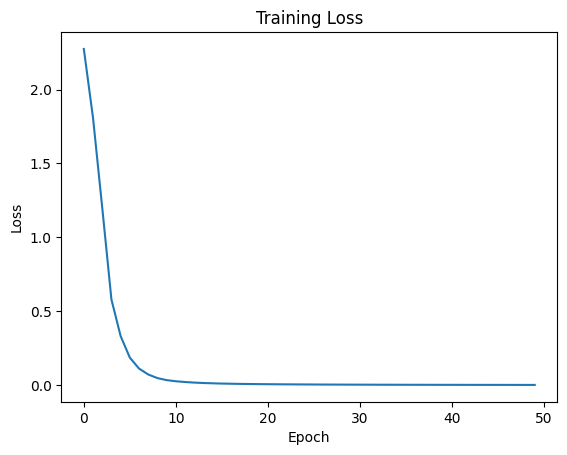

In [15]:
plt.plot(accuracies)
plt.title("Training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()
plt.plot(losses)
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [18]:
model.eval()
accuracy = 0
for data,label in test_loader :
    out = model(data)
    accuracy += torch.sum(torch.sigmoid(out).argmax(dim=1) == label)

accuracy = accuracy/ len(test_loader.dataset)
print(accuracy)

tensor(0.6667)
